# Python code for data analysis with Ebola outbreak simulation data
## The data is from the R outbreaks package from this link "https://github.com/reconverse/outbreaks/tree/master/data"
## The analysis has two parts including descriptive analysis and some simple stats tests 

## 1.1 Python descriptive analysis and crosstabs

In [1]:
#importing required packages
import pandas as pd
import pandas_profiling
import numpy as np
#importing the data
df = pd.read_csv('Ebola_Outbreak_Simulation.csv').fillna("NA")

In [2]:
#descriptive statistics using pandas_profiling
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
#Summary statistics using pandas
df.describe()

generation          lon          lat        wt_kg        ht_cm  \
count  5888.000000  5888.000000  5888.000000  5888.000000  5888.000000   
mean     16.561651   -13.233806     8.469638    52.644871   124.963315   
std       5.791133     0.019405     0.011281    18.583846    49.521125   
min       0.000000   -13.272755     8.446206   -11.000000     4.000000   
25%      13.000000   -13.251530     8.461218    41.000000    91.000000   
50%      16.000000   -13.229079     8.468989    54.000000   129.000000   
75%      20.000000   -13.216631     8.479541    66.000000   159.000000   
max      37.000000   -13.205224     8.491748   111.000000   295.000000   

          ct_blood          bmi  
count  5888.000000  5888.000000  
mean     21.206861    46.890230  
std       1.688803    55.388287  
min      16.000000 -1200.000000  
25%      20.000000    24.560326  
50%      22.000000    32.123961  
75%      22.000000    50.006760  
max      26.000000  1250.000000

In [4]:
df.head()
df.columns

case_id  generation date_infection  date_onset date_hospitalisation  \
0  5fe599           4     2014-05-08  2014-05-13           2014-05-15   
1  8689b7           4             NA  2014-05-13           2014-05-14   
2  11f8ea           2             NA  2014-05-16           2014-05-18   
3  b8812a           3     2014-05-04  2014-05-18           2014-05-20   
4  893f25           3     2014-05-18  2014-05-21           2014-05-22   

  date_outcome  outcome gender   age age_unit  ... ct_blood fever chills  \
0           NA       NA      m   2.0    years  ...       22    no     no   
1   2014-05-18  Recover      f   3.0    years  ...       22    NA     NA   
2   2014-05-30  Recover      m  56.0    years  ...       21    NA     NA   
3           NA       NA      f  18.0    years  ...       23    no     no   
4   2014-05-29  Recover      m   3.0    years  ...       23    no     no   

  cough  aches  vomit  temp time_admission         bmi  days_onset_hosp  
0   yes     no    yes  36.8             NA  117.187500              2.0  
1    NA     NA     NA  36.9          09:36   71.818443              1.0  
2    NA     NA     NA  36.9          16:48   16.065250              2.0  
3    no     no     no  36.8          11:22   22.496571              2.0  
4   yes     no    yes  36.9          12:60   71.414402              1.0  

[5 rows x 30 columns]

Index(['case_id', 'generation', 'date_infection', 'date_onset',
       'date_hospitalisation', 'date_outcome', 'outcome', 'gender', 'age',
       'age_unit', 'age_years', 'age_cat', 'age_cat5', 'hospital', 'lon',
       'lat', 'infector', 'source', 'wt_kg', 'ht_cm', 'ct_blood', 'fever',
       'chills', 'cough', 'aches', 'vomit', 'temp', 'time_admission', 'bmi',
       'days_onset_hosp'],
      dtype='object')

#### 1.1.1 cross tabulation 1 - we want to see the dat' composition between age category and gender 

In [6]:
ab = df[['age_cat','gender']]
percentage = pd.crosstab(ab.age_cat, ab.gender, normalize='columns')
count = pd.crosstab(ab.age_cat, ab.gender)
crosstab_agegroupVSgender = pd.concat([count,percentage],axis=1).reindex(['0-4', '5-9','10-14', '15-19', '20-29', '30-49', '50-69', '70+', 'NA'])

In [7]:
crosstab_agegroupVSgender

gender   NA    f    m        NA         f         m
age_cat                                            
0-4      39  640  416  0.140288  0.228001  0.148412
5-9      42  641  412  0.151079  0.228358  0.146985
10-14    40  518  383  0.143885  0.184539  0.136639
15-19    20  359  364  0.071942  0.127895  0.129861
20-29    30  468  575  0.107914  0.166726  0.205137
30-49    18  179  557  0.064748  0.063769  0.198716
50-69     2    2   91  0.007194  0.000713  0.032465
70+       1    0    5  0.003597  0.000000  0.001784
NA       86    0    0  0.309353  0.000000  0.000000

### 1.1.2 cross tab 2 for death/recover proportion under age categories 

In [9]:
cd = df[['age_cat','outcome']]

percentage = pd.crosstab(cd.outcome, cd.age_cat, normalize='columns')[['0-4','5-9', '10-14', '15-19', '20-29', '30-49',  '50-69', '70+', 'NA']]

count = pd.crosstab(cd.outcome, cd.age_cat)[['0-4','5-9', '10-14', '15-19', '20-29', '30-49',  '50-69', '70+', 'NA']]

pd.concat([count,percentage],axis=1).reindex(['Death', 'Recover', 'NA'])

age_cat  0-4  5-9  10-14  15-19  20-29  30-49  50-69  70+  NA       0-4  \
outcome                                                                   
Death    471  476    438    323    477    329     33    3  32  0.430137   
Recover  364  391    303    251    367    238     38    3  28  0.332420   
NA       260  228    200    169    229    187     24    0  26  0.237443   

age_cat       5-9     10-14     15-19     20-29     30-49     50-69  70+  \
outcome                                                                    
Death    0.434703  0.465462  0.434724  0.444548  0.436340  0.347368  0.5   
Recover  0.357078  0.321998  0.337820  0.342032  0.315650  0.400000  0.5   
NA       0.208219  0.212540  0.227456  0.213420  0.248011  0.252632  0.0   

age_cat        NA  
outcome            
Death    0.372093  
Recover  0.325581  
NA       0.302326

In [10]:
count_rearrange = count[['0-4','5-9', '10-14', '15-19', '20-29', '30-49',  '50-69', '70+', 'NA']]

In [11]:
count_rearrange = count_rearrange.reindex(['Death', 'Recover', 'NA'])

### 1.1.3 Maplotlib visualization showcase

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

<Axes:xlabel='age_cat'>

Text(0.5, 1.0, 'the outcome of Ebola patients among different age groups')

Text(0, 0.5, 'Count')

Text(0.5, 0, 'Age Group')

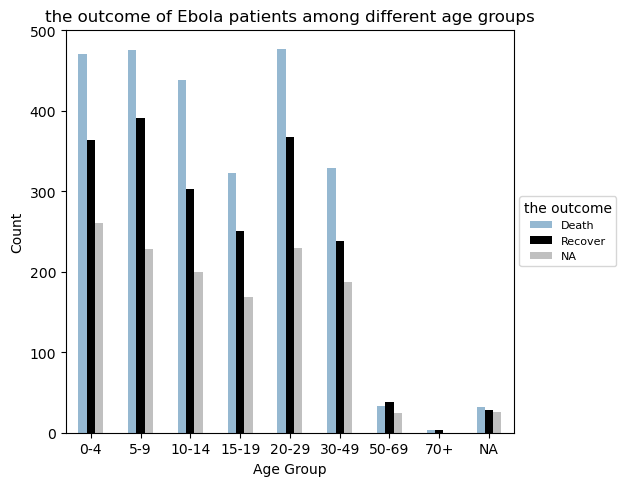

In [13]:
# Plot with an adjusted shape to accommodate the legend
ax = plt.axes([0.1, 0.1, 0.7, 0.84])
# Create bar plot
count_rearrange.T.plot.bar(rot=0, color=['#95b8d1', '#000000',"#C0C0C0"], ax=ax)
# Labels
ax.set_title('the outcome of Ebola patients among different age groups')
ax.set_ylabel('Count')
ax.set_xlabel('Age Group')
# Legend
plt.gca().legend(
    title='the outcome', fontsize=8,
    loc='center left', bbox_to_anchor=(1, 0.5)
)

## 1.2 Python some stats tests

### 1.2.1 Chi-squared test

In [14]:
from scipy.stats import chi2
from scipy import stats
from scipy.stats import ttest_ind

In [15]:
for_chisquare_df = pd.read_csv('Ebola_Outbreak_Simulation.csv').dropna(subset=['outcome', 'gender'])[['outcome', 'gender']]

In [16]:
for_chisquare_df

outcome gender
1     Recover      f
2     Recover      m
4     Recover      m
5     Recover      f
6     Recover      f
...       ...    ...
5883  Recover      f
5884  Recover      f
5885  Recover      m
5886  Recover      m
5887    Death      f

[4358 rows x 2 columns]

In [17]:
def chi2_table(series1, series2, to_csv = False, csv_name = None, 
                prop= False):
    
    if type(series1) != list:
        crosstab = pd.crosstab(series1, series2)
        crosstab2 = pd.crosstab(series1, series2, margins= True)
        crosstab_proprow = round(crosstab2.div(crosstab2.iloc[:,-1], axis=0).mul(100, axis=0), 2)
        crosstab_propcol = round(crosstab2.div(crosstab2.iloc[-1,:], axis=1).mul(100, axis=1), 2)
        chi2, p, dof, expected = stats.chi2_contingency(crosstab)
        
        if prop == False:
            print("\n",
          f"Chi-Square test between " + series1.name + " and " + series2.name,
          "\n", "\n",
          crosstab2,
          "\n", "\n",
          f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
            
            if to_csv == True:
                if csv_name == None:
                    csv_name = f"{series2.name}.csv"
                                             
                file = open(csv_name, 'a')
                file.write(f"{crosstab2.columns.name}\n")
                file.close()
                crosstab2.to_csv(csv_name, header= True, mode= 'a')
                file = open(csv_name, 'a')
                file.write(f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
                file.write("\n")
                file.close()              
                
        if prop == 'Row':
            print("\n",
          f"Chi-Square test between " + series1.name + " and " + series2.name,
          "\n", "\n",
          crosstab_proprow,
          "\n", "\n",
          f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
            
            if to_csv == True:
                if csv_name == None:
                    csv_name = f"{series2.name}.csv"
                
                file = open(csv_name, 'a')
                file.write(f"{crosstab_proprow.columns.name}\n")
                file.close()
                crosstab_proprow.to_csv(csv_name, header= True, mode= 'a')
                file = open(csv_name, 'a')
                file.write(f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
                file.write("\n")
                file.close()

        if prop == 'Col':
            print("\n",
          f"Chi-Square test between " + series1.name + " and " + series2.name,
          "\n", "\n",
          crosstab_propcol,
          "\n", "\n",
          f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")

            if to_csv == True:
                if csv_name == None:
                    csv_name = f"{series2.name}.csv"
                    
                file = open(csv_name, 'a')
                file.write(f"{crosstab_propcol.columns.name}\n")
                file.close()
                crosstab_propcol.to_csv(csv_name, header= True, mode= 'a')
                file = open(csv_name, 'a')
                file.write(f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
                file.write("\n")
                file.close()

    elif type(series1) == list and type(series2) == list:
        for entry2 in series2:
            for entry1 in series1:
                crosstab = pd.crosstab(entry1, entry2)
                crosstab2 = pd.crosstab(entry1, entry2, margins= True)
                crosstab_proprow = round(crosstab2.div(crosstab2.iloc[:,-1], axis=0).mul(100, axis=0), 2)
                crosstab_propcol = round(crosstab2.div(crosstab2.iloc[-1,:], axis=1).mul(100, axis=1), 2)
                chi2, p, dof, expected = stats.chi2_contingency(crosstab)
                
                if prop == False:
            
                    print("\n",
          f"Chi-Square test between " + entry1.name + " and " + entry2.name,
          "\n", "\n",
          crosstab2,
          "\n", "\n",
          f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
            
                    if to_csv == True:
                        
                        file = open("%s.csv" %(entry2.name), 'a')
                        file.write(f"{crosstab2.columns.name}\n")
                        file.close()
                        crosstab2.to_csv("%s.csv" %(entry2.name), header= True, mode= 'a')
                        file = open("%s.csv" %(entry2.name), 'a')
                        file.write(f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
                        file.write("\n")
                        file.close()                        

                if prop == 'Row':
            
                    print("\n",
          f"Chi-Square test between " + entry1.name + " and " + entry2.name,
          "\n", "\n",
          crosstab_proprow,
          "\n", "\n",
          f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
            
                    if to_csv == True:
                        file = open("%s.csv" %(entry2.name), 'a')
                        file.write(f"{crosstab_proprow.columns.name}\n")
                        file.close()
                        crosstab_proprow.to_csv("%s.csv" %(entry2.name), header= True, mode= 'a')
                        file = open("%s.csv" %(entry2.name), 'a')
                        file.write(f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
                        file.write("\n")
                        file.close()
                    
                if prop == 'Col':
            
                    print("\n",
          f"Chi-Square test between " + entry1.name + " and " + entry2.name,
          "\n", "\n",
          crosstab_propcol,
          "\n", "\n",
          f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
            
                    if to_csv == True:
                        file = open("%s.csv" %(entry2.name), 'a')
                        file.write(f"{crosstab_propcol.columns.name}\n")
                        file.close()
                        crosstab_propcol.to_csv("%s.csv" %(entry2.name), header= True, mode= 'a')
                        file = open("%s.csv" %(entry2.name), 'a')
                        file.write(f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
                        file.write("\n")
                        file.close()


    elif type(series1) == list:
        for entry in series1:
            crosstab = pd.crosstab(entry, series2)
            crosstab2 = pd.crosstab(entry, series2, margins= True)
            crosstab_proprow = round(crosstab2.div(crosstab2.iloc[:,-1], axis=0).mul(100, axis=0), 2)
            crosstab_propcol = round(crosstab2.div(crosstab2.iloc[-1,:], axis=1).mul(100, axis=1), 2)
            chi2, p, dof, expected = stats.chi2_contingency(crosstab)
            
            if prop == False:
                print("\n",
          f"Chi-Square test between " + entry.name + " and " + series2.name,
          "\n", "\n",
          crosstab2,
          "\n", "\n",
          f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
            
                if to_csv == True:
                    file = open("%s.csv" %(series2.name), 'a')
                    file.write(f"{crosstab2.columns.name}\n")
                    file.close()
                    crosstab2.to_csv("%s.csv" %(series2.name), header= True, mode= 'a')
                    file = open("%s.csv" %(series2.name), 'a')
                    file.write(f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
                    file.write("\n")
                    file.close()

            if prop == 'Row':
                print("\n",
          f"Chi-Square test between " + entry.name + " and " + series2.name,
          "\n", "\n",
          crosstab_proprow,
          "\n", "\n",
          f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
            
                if to_csv == True:
                    file = open("%s.csv" %(series2.name), 'a')
                    file.write(f"{crosstab_proprow.columns.name}\n")
                    file.close()
                    crosstab_proprow.to_csv("%s.csv" %(series2.name), header= True, mode= 'a')
                    file = open("%s.csv" %(series2.name), 'a')
                    file.write(f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
                    file.write("\n")
                    file.close()

            if prop == 'Col':
                print("\n",
          f"Chi-Square test between " + entry.name + " and " + series2.name,
          "\n", "\n",
          crosstab_propcol,
          "\n", "\n",
          f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
            
                if to_csv == True:
                    file = open("%s.csv" %(series2.name), 'a')
                    file.write(f"{crosstab_propcol.columns.name}\n")
                    file.close()
                    crosstab_propcol.to_csv("%s.csv" %(series2.name), header= True, mode= 'a')
                    file = open("%s.csv" %(series2.name), 'a')
                    file.write(f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
                    file.write("\n")
                    file.close()

In [18]:
chi2_table(for_chisquare_df.outcome, for_chisquare_df.gender)


 Chi-Square test between outcome and gender 
 
 gender      f     m   All
outcome                  
Death    1227  1228  2455
Recover   953   950  1903
All      2180  2178  4358 
 
 Pearson Chi2(1)= 0.0012 p-value= 0.9725


### 1.2.2 Kruskal-Wallis test for outcome and age_years

In [19]:
for_Wallis_df = pd.read_csv('Ebola_Outbreak_Simulation.csv').dropna(subset=['outcome', 'age_years'])[['outcome', 'age_years']]

In [20]:
for_Wallis_df

outcome  age_years
1     Recover        3.0
2     Recover       56.0
4     Recover        3.0
5     Recover       16.0
6     Recover       16.0
...       ...        ...
5883  Recover        7.0
5884  Recover        2.0
5885  Recover       36.0
5886  Recover       20.0
5887    Death        7.0

[4505 rows x 2 columns]

In [21]:
stats.kruskal(*[group["age_years"].values for name, group in for_Wallis_df.groupby("outcome")])

KruskalResult(statistic=0.04567493794601044, pvalue=0.8307677866410457)

### 1.2.3 T test for gender and age_years

In [22]:
for_t_test_df = pd.read_csv('Ebola_Outbreak_Simulation.csv').dropna(subset=['gender', 'age_years'])[['gender', 'age_years']]

In [23]:
for_t_test_df.gender.unique()

array(['m', 'f'], dtype=object)

In [24]:
for_t_test_df_male = for_t_test_df[for_t_test_df.gender=='m']
for_t_test_df_female = for_t_test_df[for_t_test_df.gender=='f']

In [25]:
for_t_test_df_male

gender  age_years
0         m        2.0
2         m       56.0
4         m        3.0
8         m       61.0
10        m       12.0
...     ...        ...
5880      m       13.0
5881      m       11.0
5882      m       17.0
5885      m       36.0
5886      m       20.0

[2803 rows x 2 columns]

In [26]:
ttest_ind(for_t_test_df_female.age_years,for_t_test_df_male.age_years)

Ttest_indResult(statistic=-21.349854452651915, pvalue=2.6687700355625376e-97)